In [1]:
# The nomral imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules and libraries we will use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [16]:
dataset = randn(25)

(0, 1)

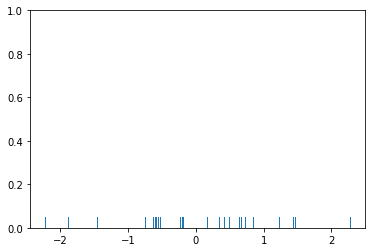

In [4]:
sns.rugplot(dataset)

plt.ylim(0,1)

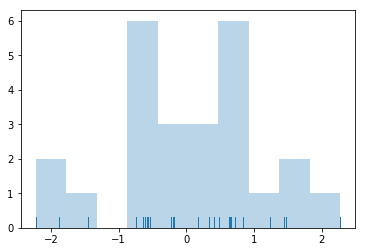

In [7]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

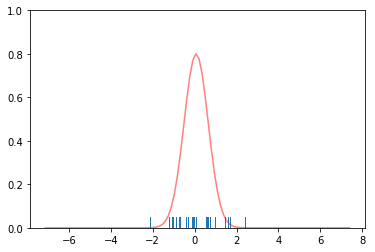

In [18]:
sns.rugplot(dataset)

x_min = dataset.min() - 5
x_max = dataset.max() + 5

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) **0.2

kernel_list = []
for data_point in dataset:
    
    #Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
# Scale for plotting 
kernel = kernel / kernel.max()
kernel = kernel * 0.8

plt.plot(x_axis,kernel,color='red',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis functions')

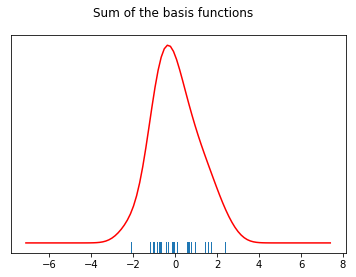

In [19]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='red')
sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

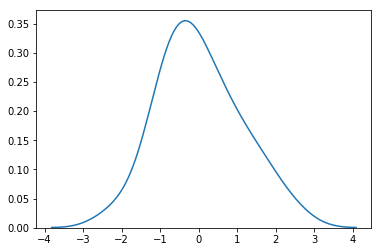

In [20]:
sns.kdeplot(dataset)

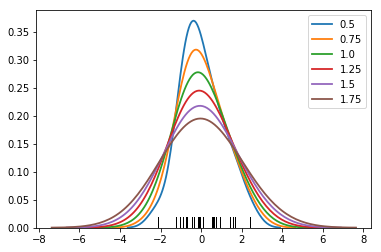

In [22]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

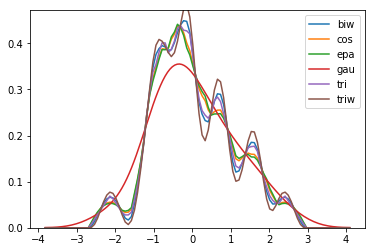

In [23]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

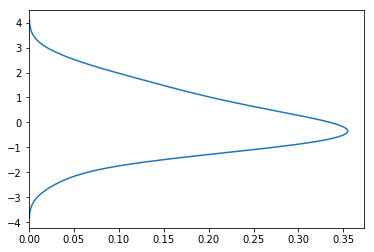

In [26]:
sns.kdeplot(dataset,vertical=True)

In [30]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.mulitvariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)

AttributeError: module 'numpy.random' has no attribute 'mulitvariate_normal'